# Loading Dataset into Panda Dataframe

In [1]:
from azureml.core import Workspace
ws = Workspace.from_config()
print(ws)

If you run your code in unattended mode, i.e., where you can't give a user input, then we recommend to use ServicePrincipalAuthentication or MsiAuthentication.
Please refer to aka.ms/aml-notebook-auth for different authentication mechanisms in azureml-sdk.


Workspace.create(name='mldemows', subscription_id='292890d4-aa6d-4d5e-a085-97c80db3c30a', resource_group='mldemo')


In [2]:
from azureml.core import Datastore, Dataset
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
# Refer - https://learn.microsoft.com/en-us/azure/machine-learning/v1/how-to-create-register-datasets

# retrieve an existing datastore in the workspace by name
datastore_name = 'mldemoblob'
datastore = Datastore.get(ws, datastore_name)
print(datastore)

{
  "name": "mldemoblob",
  "container_name": "mlfiles",
  "account_name": "mldemoblobmahtabsyed1",
  "protocol": "https",
  "endpoint": "core.windows.net"
}


In [4]:
# create a TabularDataset from the file path in datastore
datastore_path = [(datastore, 'melb_data.csv')]
tabdf = Dataset.Tabular.from_delimited_files(path=datastore_path)
print(tabdf)

TabularDataset
{
  "source": [
    "('mldemoblob', 'melb_data.csv')"
  ],
  "definition": [
    "GetDatastoreFiles",
    "ParseDelimited",
    "DropColumns",
    "SetColumnTypes"
  ]
}


In [5]:
# increase display of all columns of rows for panda datasets
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# create panda dataframe
raw_df = tabdf.to_pandas_dataframe()
raw_df.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
0 2016-09-03       2.5    3067.0       2.0       1.0  1.0     126.0   
1 2016-12-03       2.5    3067.0       2.0       1.0  1.0     202.0   
2 2016-02-04       2.5    3067.0       2.0       1.0  0.0     156.0   
3 2016-02-04       2.5    3067.0       3.0       2.0  1.0       0.0   
4 2017-03-04       2.5    3067.0       3.0       2.0  0.0     134.0   

   BuildingArea  YearBuilt         CouncilArea  Lattitude  Longtitude  \
0           NaN        NaN  Yarra City Council   -37.8014    144.9958   
1           NaN        NaN  Yarra City Council   -37.7996    144.9984   
2          79.0     1900.0  Yarra City Council   -37.8079    144.9934   
3           NaN        NaN  Yarra City Council   -37.8114    145.0116   
4         150.0     1900.0  Yarra City Council   -37.8093    144.9944   

              Regionname  Propertycount  
0  Northern Metropolitan         4019.0  
1  Northern Metropolitan         4019.0  
2  Northern Metropolitan         4019.0  
3  Northern Metropolitan         4019.0  
4  Northern Metropolitan         4019.0

## Data Definition
- Rooms: Number of rooms
- Price: Price in dollars
- Method:<br> S - property sold; <br>
        SP - property sold prior;<br> 
        PI - property passed in; <br>
        PN - sold prior not disclosed;<br> 
        SN - sold not disclosed; <br>
        NB - no bid; <br>
        VB - vendor bid; <br>
        W - withdrawn prior to auction;<br> 
        SA - sold after auction; <br>
        SS - sold after auction price not disclosed.<br> 
        N/A - price or highest bid not available.

- Type:<br>   br - bedroom(s);<br> 
        h - house,cottage,villa, semi,terrace; <br>
        u - unit, duplex; <br>
        t - townhouse; <br>
        dev site - development site; <br>
        o res - other residential.
        
- SellerG: Real Estate Agent
- Date: Date sold
- Distance: Distance from CBD
- Regionname: General Region (West, North West, North, North east …etc)
- Propertycount: Number of properties that exist in the suburb.
- Bedroom2 : Scraped # of Bedrooms (from different source)
- Bathroom: Number of Bathrooms
- Car: Number of carspots
- Landsize: Land Size
- BuildingArea: Building Size
- CouncilArea: Governing council for the area

# Data Exploration

In [6]:
# The shape shows us the number of columns (features/pot. labels)= 21 and the number of rows (samples) = 13580
raw_df.shape

(34857, 21)

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13558 non-null  float64       
 15  YearBuilt      1555

In [8]:
raw_df.isnull().sum()*100/raw_df.shape[0]

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     61.103939
YearBuilt        55.386293
CouncilArea       0.000000
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.000000
Propertycount     0.008607
dtype: float64

In [9]:
# Understanding value_counts
data = {"state" : ["NSW", "NSW", "NSW", "VIC", "VIC", "VIC"],
        "year": [2000, 2000, 2002, 2001, 2002, 2003],
        "population": [1.5, 1.5, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

state  year  population
0   NSW  2000         1.5
1   NSW  2000         1.5
2   NSW  2002         3.6
3   VIC  2001         2.4
4   VIC  2002         2.9
5   VIC  2003         3.2

In [10]:
frame.value_counts()

state  year  population
NSW    2000  1.5           2
       2002  3.6           1
VIC    2001  2.4           1
       2002  2.9           1
       2003  3.2           1
dtype: int64

In [11]:
# calculate Unique Values, Missing Values Percentage, Percentage of Values in the biggest category and Datatype
stats = []
for cl in raw_df.columns:
    stats.append((cl, 
                  raw_df[cl].nunique(), 
                  raw_df[cl].isnull().sum(),
                  raw_df[cl].isnull().sum() * 100 / raw_df.shape[0],
                  raw_df[cl].value_counts(normalize=True, dropna=False).values[0] * 100,
                  raw_df[cl].dtype))

# create new dataframe containing the above mentioned stats    
stats_df = pd.DataFrame(stats, columns=['Feature', 
                                        'Unique Values',
                                        'Missing Values',
                                        'Missing Values [%]',
                                        'Values in the biggest category [%]',
                                        'Datatype'])

stats_df.sort_values('Missing Values [%]', ascending=False)

Feature  Unique Values  Missing Values  Missing Values [%]  \
14   BuildingArea            558           21299           61.103939   
15      YearBuilt            160           19306           55.386293   
13       Landsize           1684           11810           33.881286   
12            Car             15            8728           25.039447   
11       Bathroom             11            8226           23.599277   
10       Bedroom2             15            8217           23.573457   
18     Longtitude          14524            7976           22.882061   
17      Lattitude          13402            7976           22.882061   
4           Price           2871            7610           21.832057   
20  Propertycount            342               3            0.008607   
9        Postcode            211               1            0.002869   
8        Distance            215               1            0.002869   
1         Address          34009               0            0.000000   
7            Date             78               0            0.000000   
6         SellerG            388               0            0.000000   
5          Method              9               0            0.000000   
16    CouncilArea             34               0            0.000000   
3            Type              3               0            0.000000   
2           Rooms             12               0            0.000000   
19     Regionname              9               0            0.000000   
0          Suburb            351               0            0.000000   

    Values in the biggest category [%]        Datatype  
14                           61.103939         float64  
15                           55.386293         float64  
13                           33.881286         float64  
12                           35.040308         float64  
11                           37.206300         float64  
10                           34.084976         float64  
18                           22.882061         float64  
17                           22.882061         float64  
4                            21.832057         float64  
20                            2.421321         float64  
9                             2.421321         float64  
8                             4.073787         float64  
1                             0.017213          object  
7                             3.210259  datetime64[ns]  
6                             9.636515          object  
5                            56.642855          object  
16                           10.543076          object  
3                            68.795364          object  
2                            43.273948           int64  
19                           33.955877          object  
0                             2.421321          object

First look at the above results. What do we see?

- we seem to have 4 features with missing values (BuildingArea, YearBuilt, CouncilArea, Car)

- looking at the datatypes, there seem to be a lot of float64, even though a lot of them are very small integer numbers, like YearBuilt, Car, Bathroom, Bedroom2, Postcode, Price. Float64 stores as the name suggest data in 64-bit. On top of that, but probably not a problem in this case, it can only represent a real number to a certain extent of precision. Either way, most of these are small natural numbers, which we could store in int32 to save space.

- there are 7 features of type Object, which means they are probably strings. We should have a look at them.<br>
        Type has 3 distinct values, our definitions shows 6<br>
        Method has 5 distinct values, our definition shows 11<br>
        SellerG has 268 distinct seller names<br>
        Address has 13378 distinct values, but we have 13580 samples, so there seems to be places with the same address<br>
        Regionname has 8 distinct values, the regions of Melbourne<br>
        Subburb has 314 distinct values, the suburbs of Melbourne<br>
        CouncilArea has 33 distinct values, and is the only categorical feature with missing values<br>

- we see there is a column called Price, which might be a good label/target for supervised training.

Before doing anything else, lets clean some names and get rid of some features that might be not of too much interest for our first analysis.

# First Data Cleansing

In [12]:
# Let's remove the Address and the Seller for now (we can add them later back into the mix)
df = raw_df.drop(['Address', 'SellerG'],axis=1)
# rename some of the columns
df = df.rename(columns={'Bedroom2': 'Bedrooms', 'Bathroom': 'Bathrooms','Regionname': 'Region', 'Car': 'Parking', 'Propertycount': 'SuburbPropCount'})
df.head()

Suburb  Rooms Type      Price Method       Date  Distance  Postcode  \
0  Abbotsford      2    h        NaN     SS 2016-09-03       2.5    3067.0   
1  Abbotsford      2    h  1480000.0      S 2016-12-03       2.5    3067.0   
2  Abbotsford      2    h  1035000.0      S 2016-02-04       2.5    3067.0   
3  Abbotsford      3    u        NaN     VB 2016-02-04       2.5    3067.0   
4  Abbotsford      3    h  1465000.0     SP 2017-03-04       2.5    3067.0   

   Bedrooms  Bathrooms  Parking  Landsize  BuildingArea  YearBuilt  \
0       2.0        1.0      1.0     126.0           NaN        NaN   
1       2.0        1.0      1.0     202.0           NaN        NaN   
2       2.0        1.0      0.0     156.0          79.0     1900.0   
3       3.0        2.0      1.0       0.0           NaN        NaN   
4       3.0        2.0      0.0     134.0         150.0     1900.0   

          CouncilArea  Lattitude  Longtitude                 Region  \
0  Yarra City Council   -37.8014    144.9958  Northern Metropolitan   
1  Yarra City Council   -37.7996    144.9984  Northern Metropolitan   
2  Yarra City Council   -37.8079    144.9934  Northern Metropolitan   
3  Yarra City Council   -37.8114    145.0116  Northern Metropolitan   
4  Yarra City Council   -37.8093    144.9944  Northern Metropolitan   

   SuburbPropCount  
0           4019.0  
1           4019.0  
2           4019.0  
3           4019.0  
4           4019.0

## Duplicates

In [13]:
# check for duplicated entries
s = df.duplicated(keep = False)
s = s[s == True]
s

77       True
78       True
911      True
914      True
1191     True
1192     True
2584     True
2585     True
2743     True
2744     True
2745     True
6003     True
6006     True
6422     True
6423     True
6604     True
6605     True
6733     True
6735     True
7139     True
7140     True
7331     True
7335     True
7853     True
7854     True
10438    True
10442    True
12654    True
12655    True
13101    True
13110    True
13449    True
13452    True
14617    True
14618    True
15803    True
15804    True
15857    True
15858    True
18170    True
18171    True
18757    True
18758    True
19103    True
19104    True
20415    True
20416    True
23987    True
23988    True
26454    True
26459    True
28099    True
28101    True
28177    True
28179    True
28299    True
28301    True
28336    True
28337    True
28468    True
28469    True
29917    True
29918    True
30418    True
30419    True
30640    True
30641    True
30729    True
30732    True
30801    True
30802    True
31805 

In [14]:
df.loc[[77,78]]

Suburb  Rooms Type     Price Method       Date  Distance  Postcode  \
77  Airport West      4    h  960000.0      S 2016-08-06      13.5    3042.0   
78  Airport West      4    h  960000.0      S 2016-08-06      13.5    3042.0   

    Bedrooms  Bathrooms  Parking  Landsize  BuildingArea  YearBuilt  \
77       NaN        NaN      NaN       NaN           NaN        NaN   
78       NaN        NaN      NaN       NaN           NaN        NaN   

                   CouncilArea  Lattitude  Longtitude                Region  \
77  Moonee Valley City Council        NaN         NaN  Western Metropolitan   
78  Moonee Valley City Council        NaN         NaN  Western Metropolitan   

    SuburbPropCount  
77           3464.0  
78           3464.0

In [15]:
df.loc[[911,914]]

Suburb  Rooms Type  Price Method       Date  Distance  Postcode  \
911  Balwyn      5    h    NaN     SP 2016-11-12       9.7    3103.0   
914  Balwyn      5    h    NaN     SP 2016-11-12       9.7    3103.0   

     Bedrooms  Bathrooms  Parking  Landsize  BuildingArea  YearBuilt  \
911       NaN        NaN      NaN       NaN           NaN        NaN   
914       NaN        NaN      NaN       NaN           NaN        NaN   

                 CouncilArea  Lattitude  Longtitude                 Region  \
911  Boroondara City Council        NaN         NaN  Southern Metropolitan   
914  Boroondara City Council        NaN         NaN  Southern Metropolitan   

     SuburbPropCount  
911           5682.0  
914           5682.0

In [16]:
df.shape

(34857, 19)

In [17]:
df.drop_duplicates(keep='first', inplace=True, ignore_index=False)

In [18]:
df.shape

(34814, 19)

In [19]:
# check for duplicated rows again - should be 0
s = df.duplicated(keep = False)
s = s[s == True]
s

Series([], dtype: bool)

## Abbreviated Categories

In [20]:
# Let's have a look at the features with missing categories compared to the definition
df['Method'].unique()

array(['SS', 'S', 'VB', 'SP', 'PI', 'SN', 'W', 'PN', 'SA'], dtype=object)

We have:<br>
        S - property sold; <br>
        SP - property sold prior; <br>
        PI - property passed in; <br>
        VB - vendor bid; <br>
        SA - sold after auction; 

We are missing:<br>
        W - withdrawn prior to auction; <br>
        SS - sold after auction price not disclosed. <br>
        N/A - price or highest bid not available.<br>
        PN - sold prior not disclosed; <br>
        SN - sold not disclosed; <br>
        NB - no bid; 

Apparently, there has been already some cleaning being done on this dataset and the entries of unsold houses or houses without a price have been discarded.
       

In [21]:
# Let's have a look at the features with missing categories compared to the definition
df['Type'].unique()

array(['h', 'u', 't'], dtype=object)

We have:<br>
           h - house,cottage,villa,semi,terrace; <br>
           u - unit, duplex; <br>
           t - townhouse; 
           
We do not have:       
           br - bedroom(s); <br>
           dev site - development site; <br>
           o res - other residential.

Apparently also here, the data was precleaned, removing single bedroom offers, developement sites and others, leaving us with houses, units and townhouses.

In [22]:
# Let's replace abbreviations
df = df.replace({'Type': {'h':'house','u':'unit','t':'townhouse'}})
df = df.replace({'Method': {'S':'Property Sold','SP':'Property Sold Prior','PI':'Property Passed In',
                            'VB':'Vendor Bid', 'SA':'Sold After Auction'}})
df.head()

Suburb  Rooms   Type      Price               Method       Date  \
0  Abbotsford      2  house        NaN                   SS 2016-09-03   
1  Abbotsford      2  house  1480000.0        Property Sold 2016-12-03   
2  Abbotsford      2  house  1035000.0        Property Sold 2016-02-04   
3  Abbotsford      3   unit        NaN           Vendor Bid 2016-02-04   
4  Abbotsford      3  house  1465000.0  Property Sold Prior 2017-03-04   

   Distance  Postcode  Bedrooms  Bathrooms  Parking  Landsize  BuildingArea  \
0       2.5    3067.0       2.0        1.0      1.0     126.0           NaN   
1       2.5    3067.0       2.0        1.0      1.0     202.0           NaN   
2       2.5    3067.0       2.0        1.0      0.0     156.0          79.0   
3       2.5    3067.0       3.0        2.0      1.0       0.0           NaN   
4       2.5    3067.0       3.0        2.0      0.0     134.0         150.0   

   YearBuilt         CouncilArea  Lattitude  Longtitude  \
0        NaN  Yarra City Council   -37.8014    144.9958   
1        NaN  Yarra City Council   -37.7996    144.9984   
2     1900.0  Yarra City Council   -37.8079    144.9934   
3        NaN  Yarra City Council   -37.8114    145.0116   
4     1900.0  Yarra City Council   -37.8093    144.9944   

                  Region  SuburbPropCount  
0  Northern Metropolitan           4019.0  
1  Northern Metropolitan           4019.0  
2  Northern Metropolitan           4019.0  
3  Northern Metropolitan           4019.0  
4  Northern Metropolitan           4019.0

## Postcodes vs Suburbs

In [23]:
#One might think, what about the postcode and the suburb, how are they connected. Let's have a look:
postcodes_df = df.groupby('Postcode', as_index=False).Suburb.nunique()
postcodes_df.columns = ['Postcode', '#Assigned Suburbs']
postcodes_df.loc[postcodes_df['#Assigned Suburbs'] > 1]

Postcode  #Assigned Suburbs
5      3011.0                  2
6      3012.0                  4
8      3015.0                  3
9      3016.0                  2
10     3018.0                  2
12     3020.0                  4
13     3021.0                  4
15     3023.0                  5
19     3028.0                  3
20     3029.0                  3
21     3030.0                  4
22     3031.0                  2
23     3032.0                  3
27     3037.0                  4
28     3038.0                  3
30     3040.0                  3
31     3041.0                  3
32     3042.0                  3
33     3043.0                  3
35     3046.0                  3
36     3047.0                  3
37     3048.0                  2
38     3049.0                  2
42     3054.0                  2
46     3058.0                  2
50     3064.0                  4
54     3068.0                  2
62     3078.0                  2
63     3079.0                  2
64     3081.0                  3
66     3083.0                  2
67     3084.0                  5
68     3085.0                  2
69     3087.0                  2
70     3088.0                  3
75     3095.0                  3
80     3103.0                  2
88     3113.0                  2
91     3121.0                  3
97     3127.0                  2
99     3130.0                  3
100    3131.0                  2
102    3133.0                  2
103    3134.0                  3
104    3135.0                  2
105    3136.0                  5
113    3144.0                  2
114    3145.0                  2
116    3147.0                  2
119    3150.0                  2
121    3152.0                  2
122    3153.0                  2
125    3156.0                  2
128    3160.0                  2
130    3162.0                  2
131    3163.0                  3
133    3166.0                  4
135    3168.0                  2
136    3169.0                  2
139    3172.0                  2
142    3175.0                  2
143    3177.0                  2
147    3181.0                  2
151    3185.0                  3
154    3188.0                  2
159    3193.0                  2
161    3195.0                  5
162    3196.0                  4
163    3197.0                  2
165    3199.0                  2
169    3204.0                  3
171    3206.0                  2
173    3335.0                  2
174    3337.0                  3
175    3338.0                  3
176    3340.0                  3
179    3429.0                  2
181    3437.0                  3
185    3754.0                  2
192    3782.0                  2
202    3807.0                  2
209    3977.0                  7

In [24]:
postcodes_df.loc[postcodes_df['#Assigned Suburbs'] > 1].count()

Postcode             82
#Assigned Suburbs    82
dtype: int64

Of 198 postcodes, 73 are used for multiple suburbs. still, the postcodes are a subset of the suburbs and probably not necessary. Judging by this, let us remove the postcode for now.

In [25]:
df = df.drop(['Postcode'],axis=1)
df.head()

Suburb  Rooms   Type      Price               Method       Date  \
0  Abbotsford      2  house        NaN                   SS 2016-09-03   
1  Abbotsford      2  house  1480000.0        Property Sold 2016-12-03   
2  Abbotsford      2  house  1035000.0        Property Sold 2016-02-04   
3  Abbotsford      3   unit        NaN           Vendor Bid 2016-02-04   
4  Abbotsford      3  house  1465000.0  Property Sold Prior 2017-03-04   

   Distance  Bedrooms  Bathrooms  Parking  Landsize  BuildingArea  YearBuilt  \
0       2.5       2.0        1.0      1.0     126.0           NaN        NaN   
1       2.5       2.0        1.0      1.0     202.0           NaN        NaN   
2       2.5       2.0        1.0      0.0     156.0          79.0     1900.0   
3       2.5       3.0        2.0      1.0       0.0           NaN        NaN   
4       2.5       3.0        2.0      0.0     134.0         150.0     1900.0   

          CouncilArea  Lattitude  Longtitude                 Region  \
0  Yarra City Council   -37.8014    144.9958  Northern Metropolitan   
1  Yarra City Council   -37.7996    144.9984  Northern Metropolitan   
2  Yarra City Council   -37.8079    144.9934  Northern Metropolitan   
3  Yarra City Council   -37.8114    145.0116  Northern Metropolitan   
4  Yarra City Council   -37.8093    144.9944  Northern Metropolitan   

   SuburbPropCount  
0           4019.0  
1           4019.0  
2           4019.0  
3           4019.0  
4           4019.0

## Categorical Features

In [26]:
df['CouncilArea'].unique()

array(['Yarra City Council', 'Moonee Valley City Council',
       'Port Phillip City Council', 'Darebin City Council',
       'Hobsons Bay City Council', 'Stonnington City Council',
       'Boroondara City Council', 'Monash City Council',
       'Glen Eira City Council', 'Whitehorse City Council',
       'Maribyrnong City Council', 'Bayside City Council',
       'Moreland City Council', 'Manningham City Council',
       'Melbourne City Council', 'Banyule City Council',
       'Brimbank City Council', 'Kingston City Council',
       'Hume City Council', 'Knox City Council', 'Maroondah City Council',
       'Casey City Council', 'Melton City Council',
       'Greater Dandenong City Council', 'Nillumbik Shire Council',
       'Cardinia Shire Council', 'Whittlesea City Council',
       'Frankston City Council', 'Macedon Ranges Shire Council',
       'Yarra Ranges Shire Council', 'Wyndham City Council',
       'Moorabool Shire Council', 'Mitchell Shire Council', '#N/A'],
      dtype=object)

We see there is a category called "Unavailable" and the missing values labelled with None. We will come back to this later.

In [27]:
df['Suburb'].unique()

array(['Abbotsford', 'Airport West', 'Albert Park', 'Alphington',
       'Altona', 'Altona North', 'Armadale', 'Ascot Vale', 'Ashburton',
       'Ashwood', 'Avondale Heights', 'Balaclava', 'Balwyn',
       'Balwyn North', 'Bentleigh', 'Bentleigh East', 'Box Hill',
       'Braybrook', 'Brighton', 'Brighton East', 'Brunswick',
       'Brunswick West', 'Bulleen', 'Burwood', 'Camberwell', 'Canterbury',
       'Carlton North', 'Carnegie', 'Caulfield', 'Caulfield North',
       'Caulfield South', 'Chadstone', 'Clifton Hill', 'Coburg',
       'Coburg North', 'Collingwood', 'Doncaster', 'Eaglemont',
       'Elsternwick', 'Elwood', 'Essendon', 'Essendon North', 'Fairfield',
       'Fitzroy', 'Fitzroy North', 'Flemington', 'Footscray', 'Glen Iris',
       'Glenroy', 'Gowanbrae', 'Hadfield', 'Hampton', 'Hampton East',
       'Hawthorn', 'Heidelberg Heights', 'Heidelberg West', 'Hughesdale',
       'Ivanhoe', 'Kealba', 'Keilor East', 'Kensington', 'Kew',
       'Kew East', 'Kooyong', 'Maidstone', 

Normally, at this point we should use fuzzy matching techniques to see, if there are duplicate entries that are written similarly or have a typo or a space somewhere, but we leave it at this for now.

# Statistical Analysis

In [28]:
# show statistical properties for the numerical features, 
# the lambda converts values into a more readable format (float is shown in scientific notion)
dist_df = df.describe().T.apply(lambda s: s.apply(lambda x: format(x, 'g')))
dist_df

count         mean        std       min       25%       50%  \
Rooms            34814      3.03111   0.969937         1         2         3   
Price            27235  1.05026e+06     641573     85000    635000    870000   
Distance         34813      11.1861    6.78772         0       6.4      10.3   
Bedrooms         26638      3.08465   0.980726         0         2         3   
Bathrooms        26629      1.62473   0.724187         0         1         2   
Parking          26127      1.72882    1.01081         0         1         2   
Landsize         23045       593.61    3398.99         0       224       521   
BuildingArea     13556      160.356    403.853         0       102       136   
YearBuilt        15549      1965.28    37.3273      1196      1940      1970   
Lattitude        26879     -37.8106  0.0902813  -38.1904  -37.8629  -37.8076   
Longtitude       26879      145.002   0.120169   144.424   144.934   145.008   
SuburbPropCount  34811      7571.27    4427.96        83      4385      6763   

                       75%       max  
Rooms                    4        16  
Price            1.295e+06  1.12e+07  
Distance                14      48.1  
Bedrooms                 4        30  
Bathrooms                2        12  
Parking                  2        26  
Landsize               670    433014  
BuildingArea           188     44515  
YearBuilt             2000      2106  
Lattitude         -37.7541  -37.3902  
Longtitude         145.072   145.526  
SuburbPropCount      10412     21650

In [29]:
# Let's add some other information missing to the statistics
from pandas.api.types import is_numeric_dtype
max_count=[]
min_count=[]
mode_count=[]
mode=[]
skew=[]
for cl in df.columns:
    if (is_numeric_dtype(df[cl])):
        max_count.append(df[cl].value_counts(dropna=False).loc[df[cl].max()])
        min_count.append(df[cl].value_counts(dropna=False).loc[df[cl].min()])
        mode_count.append(df[cl].value_counts(dropna=False).loc[df[cl].mode()[0]])
        skew.append(df[cl].skew())
        mode.append(int(df[cl].mode()[0]))

dist_df['mode'] = mode
dist_df['skew'] = skew
dist_df['#values(min)'] = min_count
dist_df['#values(max)'] = max_count
dist_df['#values(mode)'] = mode_count
dist_df


count         mean        std       min       25%       50%  \
Rooms            34814      3.03111   0.969937         1         2         3   
Price            27235  1.05026e+06     641573     85000    635000    870000   
Distance         34813      11.1861    6.78772         0       6.4      10.3   
Bedrooms         26638      3.08465   0.980726         0         2         3   
Bathrooms        26629      1.62473   0.724187         0         1         2   
Parking          26127      1.72882    1.01081         0         1         2   
Landsize         23045       593.61    3398.99         0       224       521   
BuildingArea     13556      160.356    403.853         0       102       136   
YearBuilt        15549      1965.28    37.3273      1196      1940      1970   
Lattitude        26879     -37.8106  0.0902813  -38.1904  -37.8629  -37.8076   
Longtitude       26879      145.002   0.120169   144.424   144.934   145.008   
SuburbPropCount  34811      7571.27    4427.96        83      4385      6763   

                       75%       max    mode       skew  #values(min)  \
Rooms                    4        16       3   0.499780          1477   
Price            1.295e+06  1.12e+07  600000   2.588475             1   
Distance                14      48.1      11   1.501423            77   
Bedrooms                 4        30       3   1.406295            17   
Bathrooms                2        12       1   1.356548            46   
Parking                  2        26       2   2.095173          1631   
Landsize               670    433014       0  96.018157          2437   
BuildingArea           188     44515     120  98.573703            76   
YearBuilt             2000      2106    1970  -1.080898             1   
Lattitude         -37.7541  -37.3902     -37  -0.257612             1   
Longtitude         145.072   145.526     144  -0.394894             1   
SuburbPropCount      10412     21650   21650   0.992548             1   

                 #values(max)  #values(mode)  
Rooms                       1          15072  
Price                       1            235  
Distance                    6           1418  
Bedrooms                    1          11879  
Bathrooms                   1          12969  
Parking                     1          12212  
Landsize                    1           2437  
BuildingArea                1            185  
YearBuilt                   1           1490  
Lattitude                   1             25  
Longtitude                  1             21  
SuburbPropCount           843            843

Points of interest for further analysis:

- Price: Skewed to the right, we will probably see some few high prices. Not surprising.
- Distance: Skewed to the right, probably due to the one sample being 48.1km away from the CBD in Melbourne. Interestingly enough there are 6 samples with 0 distance. Sometimes 0 is a dummy value, so we should check that out. Judging by the fact that the mode 11 is set 739 times, the distance might not be exactly the distance from the city center, but the mean distance of a suburb perhaps from the city center. We should check this out.
- Bedrooms: Skewed to the right, due to some high amounts of bedrooms in some places. Curiously there are 16 samples with 0 bedrooms, which needs to be checked.
- Bathrooms: same as for bedrooms, with 34 samples of 0 bathrooms, which sounds weird.
- Parking: same as for bedrooms, but here 1026 samples with no parking spaces is not surprising.
- Landsize: Extremely skewed (95.24) to the right. The max is 433014. If we presume m2, these are about 43 hectar of land. Not impossible, but it probably would distort our modelling. 
- BuildingArea: Also extremely skewed to the right, due to the maximum size of 44515 m2. This sounds improbable, so we might want to remove that one. Also there are 17 samples with 0 building area, which also does not sound good.
- YearBuilt: skewed to the left due to the one building built in 1196.
- SuburbPropCount: slightly skewed the right. We have to see how helpful this value is.

Let's go through these points:

## Price

In [30]:
fig = px.box(df, x="Price",points="all")
fig.show()

As we presumed, still a bunch of prices past the upper fence (2.35M). Lets create a new field as the log of Price.

In [31]:
df["Price_log"] = np.log(df['Price'])

In [32]:
fig = px.box(df, x="Price_log",points="all")
fig.show()

That looks far more natural. Let's follow this one throughout.

## Distance

In [33]:
df.loc[df['Distance'] == 0]

Suburb  Rooms  Type      Price               Method       Date  \
15114  Melbourne      2  unit        NaN   Property Passed In 2017-06-03   
15115  Melbourne      2  unit   850000.0           Vendor Bid 2017-06-03   
15774  Melbourne      2  unit   740000.0           Vendor Bid 2017-06-17   
15775  Melbourne      1  unit        NaN  Property Sold Prior 2017-06-17   
15776  Melbourne      2  unit   820000.0           Vendor Bid 2017-06-17   
17120  Melbourne      2  unit   720000.0        Property Sold 2017-05-27   
17121  Melbourne      3  unit   880000.0           Vendor Bid 2017-05-27   
17638  Melbourne      2  unit        NaN   Property Passed In 2017-07-08   
17639  Melbourne      2  unit  1075000.0  Property Sold Prior 2017-07-08   
18166  Melbourne      1  unit   605000.0   Sold After Auction 2017-08-12   
18607  Melbourne      1  unit   415000.0        Property Sold 2017-07-15   
18608  Melbourne      2  unit   387000.0        Property Sold 2017-07-15   
19055  Melbourne      1  unit   510000.0           Vendor Bid 2017-07-22   
19056  Melbourne      2  unit        NaN           Vendor Bid 2017-07-22   
19552  Melbourne      2  unit   422000.0        Property Sold 2017-07-29   
19553  Melbourne      2  unit   565000.0        Property Sold 2017-07-29   
19554  Melbourne      3  unit   750000.0           Vendor Bid 2017-07-29   
19555  Melbourne      2  unit   540000.0   Property Passed In 2017-07-29   
20101  Melbourne      2  unit   520000.0           Vendor Bid 2017-09-03   
20670  Melbourne      2  unit   530000.0   Property Passed In 2017-09-09   
20671  Melbourne      3  unit   815000.0   Property Passed In 2017-09-09   
20672  Melbourne      2  unit   585000.0        Property Sold 2017-09-09   
21345  Melbourne      2  unit   660000.0        Property Sold 2017-09-16   
21346  Melbourne      2  unit   550000.0  Property Sold Prior 2017-09-16   
21347  Melbourne      4  unit  1710000.0        Property Sold 2017-09-16   
21348  Melbourne      2  unit   555000.0        Property Sold 2017-09-16   
21349  Melbourne      2  unit        NaN        Property Sold 2017-09-16   
22574  Melbourne      1  unit   390000.0   Property Passed In 2017-09-23   
22575  Melbourne      2  unit   740000.0        Property Sold 2017-09-23   
22576  Melbourne      3  unit        NaN        Property Sold 2017-09-23   
23291  Melbourne      2  unit        NaN  Property Sold Prior 2017-08-26   
23292  Melbourne      2  unit        NaN        Property Sold 2017-08-26   
23886  Melbourne      2  unit   465000.0   Property Passed In 2017-10-07   
23887  Melbourne      3  unit   790000.0        Property Sold 2017-10-07   
24534  Melbourne      1  unit   470000.0   Property Passed In 2017-10-14   
24535  Melbourne      1  unit   450000.0        Property Sold 2017-10-14   
24536  Melbourne      2  unit   820000.0        Property Sold 2017-10-14   
24537  Melbourne      1  unit   480000.0           Vendor Bid 2017-10-14   
24538  Melbourne      3  unit        NaN                   PN 2017-10-14   
24539  Melbourne      3  unit  1470000.0        Property Sold 2017-10-14   
25204  Melbourne      3  unit  6500000.0           Vendor Bid 2017-10-21   
26165  Melbourne      2  unit   648000.0        Property Sold 2017-10-28   
26166  Melbourne      2  unit   730000.0           Vendor Bid 2017-10-28   
26167  Melbourne      2  unit        NaN  Property Sold Prior 2017-10-28   
26168  Melbourne      3  unit   865000.0        Property Sold 2017-10-28   
27143  Melbourne      2  unit   370000.0   Property Passed In 2017-11-11   
27144  Melbourne      1  unit        NaN        Property Sold 2017-11-11   
27145  Melbourne      3  unit  2250000.0        Property Sold 2017-11-11   
27146  Melbourne      2  unit   670000.0  Property Sold Prior 2017-11-11   
27954  Melbourne      2  unit   844000.0        Property Sold 2017-11-18   
28859  Melbourne      2  unit        NaN  Property Sold Prior 2017-11-25   
28860  Melbourne      1  unit   575000.0        Property S

## Bedrooms

In [34]:
df.loc[df['Bedrooms'] == 0]

Suburb  Rooms       Type      Price               Method  \
218          Alphington      2  townhouse   650000.0  Property Sold Prior   
1390     Bentleigh East      3  townhouse   830000.0   Property Passed In   
1424     Bentleigh East      3      house  1355000.0        Property Sold   
1549     Bentleigh East      3      house   700000.0        Property Sold   
3717          Eaglemont      3  townhouse        NaN                   SN   
3812        Elsternwick      2       unit   410000.0           Vendor Bid   
5547            Ivanhoe      4      house  2400000.0        Property Sold   
10107      Surrey Hills      3      house  1560000.0        Property Sold   
11193    East Melbourne      2       unit   872000.0        Property Sold   
11234           Fawkner      3      house   585000.0        Property Sold   
12013  South Kingsville      3      house  1030000.0  Property Sold Prior   
12217      Balwyn North      3      house  1670000.0        Property Sold   
13558         Reservoir      4      house   678500.0        Property Sold   
14708      Airport West      4      house  1026000.0        Property Sold   
15294       South Yarra      2       unit   535000.0  Property Sold Prior   
16322          Hawthorn      2      house  1480000.0        Property Sold   
18304         St Albans      3      house   702000.0  Property Sold Prior   

            Date  Distance  Bedrooms  Bathrooms  Parking  Landsize  \
218   2016-09-24       6.4       0.0        1.0      0.0       0.0   
1390  2016-06-04      13.9       0.0        2.0      2.0     292.0   
1424  2016-10-08      13.9       0.0        1.0      2.0     818.0   
1549  2016-05-22      13.9       0.0        0.0      0.0     456.0   
3717  2016-10-08      10.3       0.0        0.0      0.0       0.0   
3812  2016-05-28       8.5       0.0        0.0      0.0       0.0   
5547  2016-06-04       7.9       0.0        2.0      2.0    1252.0   
10107 2016-09-24      11.2       0.0        2.0      1.0     335.0   
11193 2016-05-28       1.5       0.0        0.0      0.0       0.0   
11234 2016-08-06      12.4       0.0        1.0      1.0     605.0   
12013 2016-05-22       9.1       0.0        1.0      1.0     224.0   
12217 2017-04-29       9.2       0.0        0.0      0.0     818.0   
13558 2017-05-13      11.2       0.0        1.0      2.0     606.0   
14708 2017-06-03      10.4       0.0        3.0      2.0     534.0   
15294 2017-06-03       2.7       0.0        1.0      1.0       0.0   
16322 2017-06-24       5.3       0.0        0.0      0.0     241.0   
18304 2017-08-12      14.0       0.0        0.0      0.0     600.0   

       BuildingArea  YearBuilt                 CouncilArea  Lattitude  \
218             NaN        NaN        Darebin City Council  -37.78480   
1390          141.0     2012.0      Glen Eira City Council  -37.91680   
1424            NaN        NaN      Glen Eira City Council  -37.92410   
1549            NaN        NaN      Glen Eira City Council  -37.93140   
3717            NaN        NaN        Banyule City Council  -37.75940   
3812            NaN        NaN      Glen Eira City Council  -37.88630   
5547          201.0     1920.0        Banyule City Council  -37.77270   
10107         209.0     2013.0     Boroondara City Council  -37.81650   
11193           NaN        NaN      Melbourne City Council  -37.81540   
11234         103.0     1960.0           Hume City Council  -37.69850   
12013           NaN        NaN    Hobsons Bay City Council  -37.82980   
12217           NaN        NaN     Boroondara City Council  -37.79390   
13558           NaN        NaN        Darebin City Council  -37.69870   
14708           NaN        NaN  Moonee Valley City Council  -37.72623   
15294          63.0     1970.0      Melbourne City Council  -37.84468   
16322           NaN        NaN     Boroondara City Council  -37.82679   
18304           NaN        NaN       Brimbank City Council  -37.72945   

       Longtitude                 Region  SuburbPropCo

## BuildingArea

In [35]:
fig = px.box(df, y="BuildingArea",points="all")
fig.show()

A very distorted box plot. Hovering over the box you can see the statistics. The upper fence is at 317, which means statistically (presuming a normal distribution) everything above that is an outlier. Lets have a look at them.

In [36]:
df.loc[raw_df['BuildingArea'] > 317]['BuildingArea'].count()

615

Still a lot of samples in this.

In [37]:
# checking area over 2000 leaves us with 4 examples
df.loc[raw_df['BuildingArea'] > 2000]

Suburb  Rooms       Type      Price               Method  \
2466           Bulleen      4      house  1280000.0        Property Sold   
2704        Camberwell      5      house  2608000.0        Property Sold   
4256     Fitzroy North      2  townhouse   930000.0        Property Sold   
14387  Frankston South      3      house        NaN  Property Sold Prior   
15003    Glen Waverley      5      house        NaN   Property Passed In   
22632     New Gisborne      5      house  1355000.0        Property Sold   
29036   Riddells Creek      5      house        NaN  Property Sold Prior   
33405     Hampton East      4  townhouse  1180000.0   Property Passed In   

            Date  Distance  Bedrooms  Bathrooms  Parking  Landsize  \
2466  2017-03-11      11.8       4.0        1.0      2.0     732.0   
2704  2016-10-15       7.8       5.0        2.0      4.0     730.0   
4256  2016-09-03       3.5       2.0        3.0      0.0    2778.0   
14387 2017-07-01      38.0       3.0        2.0      5.0    3617.0   
15003 2017-06-03      16.7       5.0        5.0      2.0     652.0   
22632 2017-09-23      48.1       5.0        3.0      5.0   44500.0   
29036 2017-11-25      47.4       5.0        3.0      6.0       NaN   
33405 2018-03-17      13.8       4.0        3.0      2.0     674.0   

       BuildingArea  YearBuilt                   CouncilArea  Lattitude  \
2466         6791.0        NaN       Manningham City Council  -37.76150   
2704         3112.0     1920.0       Boroondara City Council  -37.84240   
4256         3558.0        NaN         Moreland City Council  -37.79030   
14387        3647.0        NaN        Frankston City Council  -38.18163   
15003        4645.0        NaN           Monash City Council  -37.90118   
22632       44515.0        NaN  Macedon Ranges Shire Council  -37.45392   
29036        2002.0     2000.0  Macedon Ranges Shire Council  -37.45940   
33405        6178.0        NaN          Bayside City Council  -37.93825   

       Longtitude                      Region  SuburbPropCount  Price_log  
2466    145.08970        Eastern Metropolitan           4480.0  14.062371  
2704    145.06390       Southern Metropolitan           8920.0  14.774094  
4256    144.98590       Northern Metropolitan           6244.0  13.742940  
14387   145.11457  South-Eastern Metropolitan           7566.0        NaN  
15003   145.16986        Eastern Metropolitan          15321.0        NaN  
22632   144.58864           Northern Victoria            849.0  14.119312  
29036   144.68910           Northern Victoria           1475.0        NaN  
33405   145.03600       Southern Metropolitan           2356.0  13.981025

As we can see the last house is 48.1 km or miles away from the city center, therefore having a landsize and building area in those values are feasible. Though if we want to understand house prices in Melbourne, this might not be that important. It is also in the Northern Victoria region and not in the metropolitan regions. We could go further here to have a look in the connection between these specific houses outside of the norm in conjunction with other features, but we will leave it at this for now.

In [38]:
df.drop([14387, 29036, 29036], inplace=True)

In [39]:
df.loc[raw_df['BuildingArea'] > 2000]

Suburb  Rooms       Type      Price              Method  \
2466         Bulleen      4      house  1280000.0       Property Sold   
2704      Camberwell      5      house  2608000.0       Property Sold   
4256   Fitzroy North      2  townhouse   930000.0       Property Sold   
15003  Glen Waverley      5      house        NaN  Property Passed In   
22632   New Gisborne      5      house  1355000.0       Property Sold   
33405   Hampton East      4  townhouse  1180000.0  Property Passed In   

            Date  Distance  Bedrooms  Bathrooms  Parking  Landsize  \
2466  2017-03-11      11.8       4.0        1.0      2.0     732.0   
2704  2016-10-15       7.8       5.0        2.0      4.0     730.0   
4256  2016-09-03       3.5       2.0        3.0      0.0    2778.0   
15003 2017-06-03      16.7       5.0        5.0      2.0     652.0   
22632 2017-09-23      48.1       5.0        3.0      5.0   44500.0   
33405 2018-03-17      13.8       4.0        3.0      2.0     674.0   

       BuildingArea  YearBuilt                   CouncilArea  Lattitude  \
2466         6791.0        NaN       Manningham City Council  -37.76150   
2704         3112.0     1920.0       Boroondara City Council  -37.84240   
4256         3558.0        NaN         Moreland City Council  -37.79030   
15003        4645.0        NaN           Monash City Council  -37.90118   
22632       44515.0        NaN  Macedon Ranges Shire Council  -37.45392   
33405        6178.0        NaN          Bayside City Council  -37.93825   

       Longtitude                 Region  SuburbPropCount  Price_log  
2466    145.08970   Eastern Metropolitan           4480.0  14.062371  
2704    145.06390  Southern Metropolitan           8920.0  14.774094  
4256    144.98590  Northern Metropolitan           6244.0  13.742940  
15003   145.16986   Eastern Metropolitan          15321.0        NaN  
22632   144.58864      Northern Victoria            849.0  14.119312  
33405   145.03600  Southern Metropolitan           2356.0  13.981025

## Landsize

In [40]:
# checking Landsize
fig = px.box(df, y="Landsize",points="all")
fig.show()

The same seems to be true for Landsize. The upper fence is at 1357, but we even see one outlier over 400000.

In [41]:
df.loc[raw_df['Landsize'] > 1357]['Landsize'].count()

583

Still a lot of houses in this one.

In [42]:
# let check for a higher number to get some samples
df.loc[raw_df['Landsize'] > 30000]

Suburb  Rooms   Type      Price              Method       Date  \
1198     Balwyn North      3  house  2000000.0          Vendor Bid 2016-08-28   
6591      Maribyrnong      2   unit   495000.0       Property Sold 2017-03-18   
8599        Reservoir      3  house   572000.0       Property Sold 2016-04-23   
15109     Maribyrnong      2   unit   585000.0       Property Sold 2017-06-03   
16539          Silvan      4  house  1070000.0       Property Sold 2017-06-24   
17293          Silvan      3  house  1085000.0       Property Sold 2017-05-27   
18036         Fitzroy      3  house  2700000.0          Vendor Bid 2017-08-12   
18531        Gisborne      4  house   807000.0       Property Sold 2017-07-15   
22632    New Gisborne      5  house  1355000.0       Property Sold 2017-09-23   
24800        Wildwood      5  house  1030000.0       Property Sold 2017-10-14   
25964  Gisborne South      3  house   930000.0       Property Sold 2017-10-28   
26868    Bullengarook      4  house  1050000.0  Property Passed In 2017-11-11   
27882   Hopetoun Park      6  house        NaN                   W 2017-11-18   
28694  Gisborne South      4  house  1350000.0  Sold After Auction 2017-11-25   
29991      Wonga Park      3  house        NaN  Property Passed In 2018-01-06   
32220    Wandin North      4  house  1150000.0  Property Passed In 2018-03-03   
32577    Diggers Rest      4  house        NaN  Property Passed In 2018-02-17   
34055    Bullengarook      4  house   865000.0       Property Sold 2018-02-24   

       Distance  Bedrooms  Bathrooms  Parking  Landsize  BuildingArea  \
1198        9.2       3.0        1.0      2.0   75100.0           NaN   
6591        8.7       2.0        2.0      2.0   37000.0           NaN   
8599       11.2       3.0        1.0      2.0   41400.0           NaN   
15109       4.3       2.0        2.0      2.0   37000.0          90.0   
16539      34.6       4.0        2.0      3.0   38490.0           NaN   
17293      34.6       3.0        2.0      2.0   76000.0           NaN   
18036       2.1       3.0        3.0      1.0  433014.0           NaN   
18531      45.9       4.0        2.0      3.0   40468.0           NaN   
22632      48.1       5.0        3.0      5.0   44500.0       44515.0   
24800      31.7       5.0        2.0      2.0   89030.0           NaN   
25964      45.9       3.0        2.0      4.0   40468.0         215.0   
26868      45.9       4.0        2.0      1.0  146699.0           NaN   
27882      37.5       6.0        3.0     10.0   33000.0           NaN   
28694      45.9       4.0        2.0      8.0   40469.0         245.0   
29991      25.2       3.0        1.0      NaN   39300.0           NaN   
32220      35.2       4.0        2.0      2.0   40500.0           NaN   
32577      27.7       4.0        2.0      NaN   80000.0           NaN   
34055      45.9       4.0        2.0      0.0   42800.0         180.0   

       YearBuilt                   CouncilArea  Lattitude  Longtitude  \
1198         NaN       Boroondara City Council  -37.80020   145.07000   
6591         NaN      Maribyrnong City Council  -37.77520   144.89250   
8599         NaN          Darebin City Council  -37.71040   145.02570   
15109     2004.0      Maribyrnong City Council  -37.77518   144.89254   
16539        NaN    Yarra Ranges Shire Council  -37.83229   145.43003   
17293        NaN    Yarra Ranges Shire Council  -37.84739   145.47052   
18036        NaN            Yarra City Council  -37.79751   144.98309   
18531        NaN  Macedon Ranges Shire Council  -37.50929   144.56444   
22632        NaN  Macedon Ranges Shire Council  -37.45392   144.58864   
24800        NaN             Hume City Council  -37.60400   144.80604   
25964        NaN  Macedon Ranges Shire Council  -37.54812   144.63257   
26868        NaN  Macedon Ranges Shire Council  -37.47540   144.51300   
27882        NaN       Moorabool Shire Council  -37.68820   144.49260   
28694     1990.0  Macedon Ranges Shire Council  -37.54300   144.5

In [43]:
indexLandsize = df.loc[raw_df['Landsize'] > 30000].index
indexLandsize

Int64Index([ 1198,  6591,  8599, 15109, 16539, 17293, 18036, 18531, 22632,
            24800, 25964, 26868, 27882, 28694, 29991, 32220, 32577, 34055],
           dtype='int64')

In [44]:
# Removing outlier landsize > 30000
df.drop(indexLandsize, inplace=True)

In [45]:
# check again
df.loc[raw_df['Landsize'] > 30000]

Empty DataFrame
Columns: [Suburb, Rooms, Type, Price, Method, Date, Distance, Bedrooms, Bathrooms, Parking, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude, Longtitude, Region, SuburbPropCount, Price_log]
Index: []

In [46]:
df.shape

(34794, 19)

Before we move on, let us store our first cleansing as a dataset in Azure ML

In [47]:
Dataset.Tabular.register_pandas_dataframe(dataframe = df, target = datastore, name ='Melbourne Housing Dataset', description = 'Data Cleansing 1 - removed address, postcode, duplicates and outliers')

Validating arguments.
Arguments validated.
Successfully obtained datastore reference and path.
Uploading file to managed-dataset/7a148f4d-c98a-45da-977d-30208d165f75/
Successfully uploaded file to datastore.
Creating and registering a new dataset.
Successfully created and registered a new dataset.


{
  "source": [
    "('mldemoblob', 'managed-dataset/7a148f4d-c98a-45da-977d-30208d165f75/')"
  ],
  "definition": [
    "GetDatastoreFiles",
    "ReadParquetFile",
    "DropColumns"
  ],
  "registration": {
    "id": "4e2372e0-f2a2-43c5-852a-07616b2d75db",
    "name": "Melbourne Housing Dataset",
    "version": 4,
    "description": "Data Cleansing 1 - removed address, postcode, duplicates and outliers",
    "workspace": "Workspace.create(name='mldemows', subscription_id='292890d4-aa6d-4d5e-a085-97c80db3c30a', resource_group='mldemo')"
  }
}

# Missing Values and Correlations

In [48]:
# If we would drop any row with an empty value, we would loose half the dataset (6196 rows left). Lets look at the row distribution of missing values.
df.dropna(how='any').shape

(8751, 19)

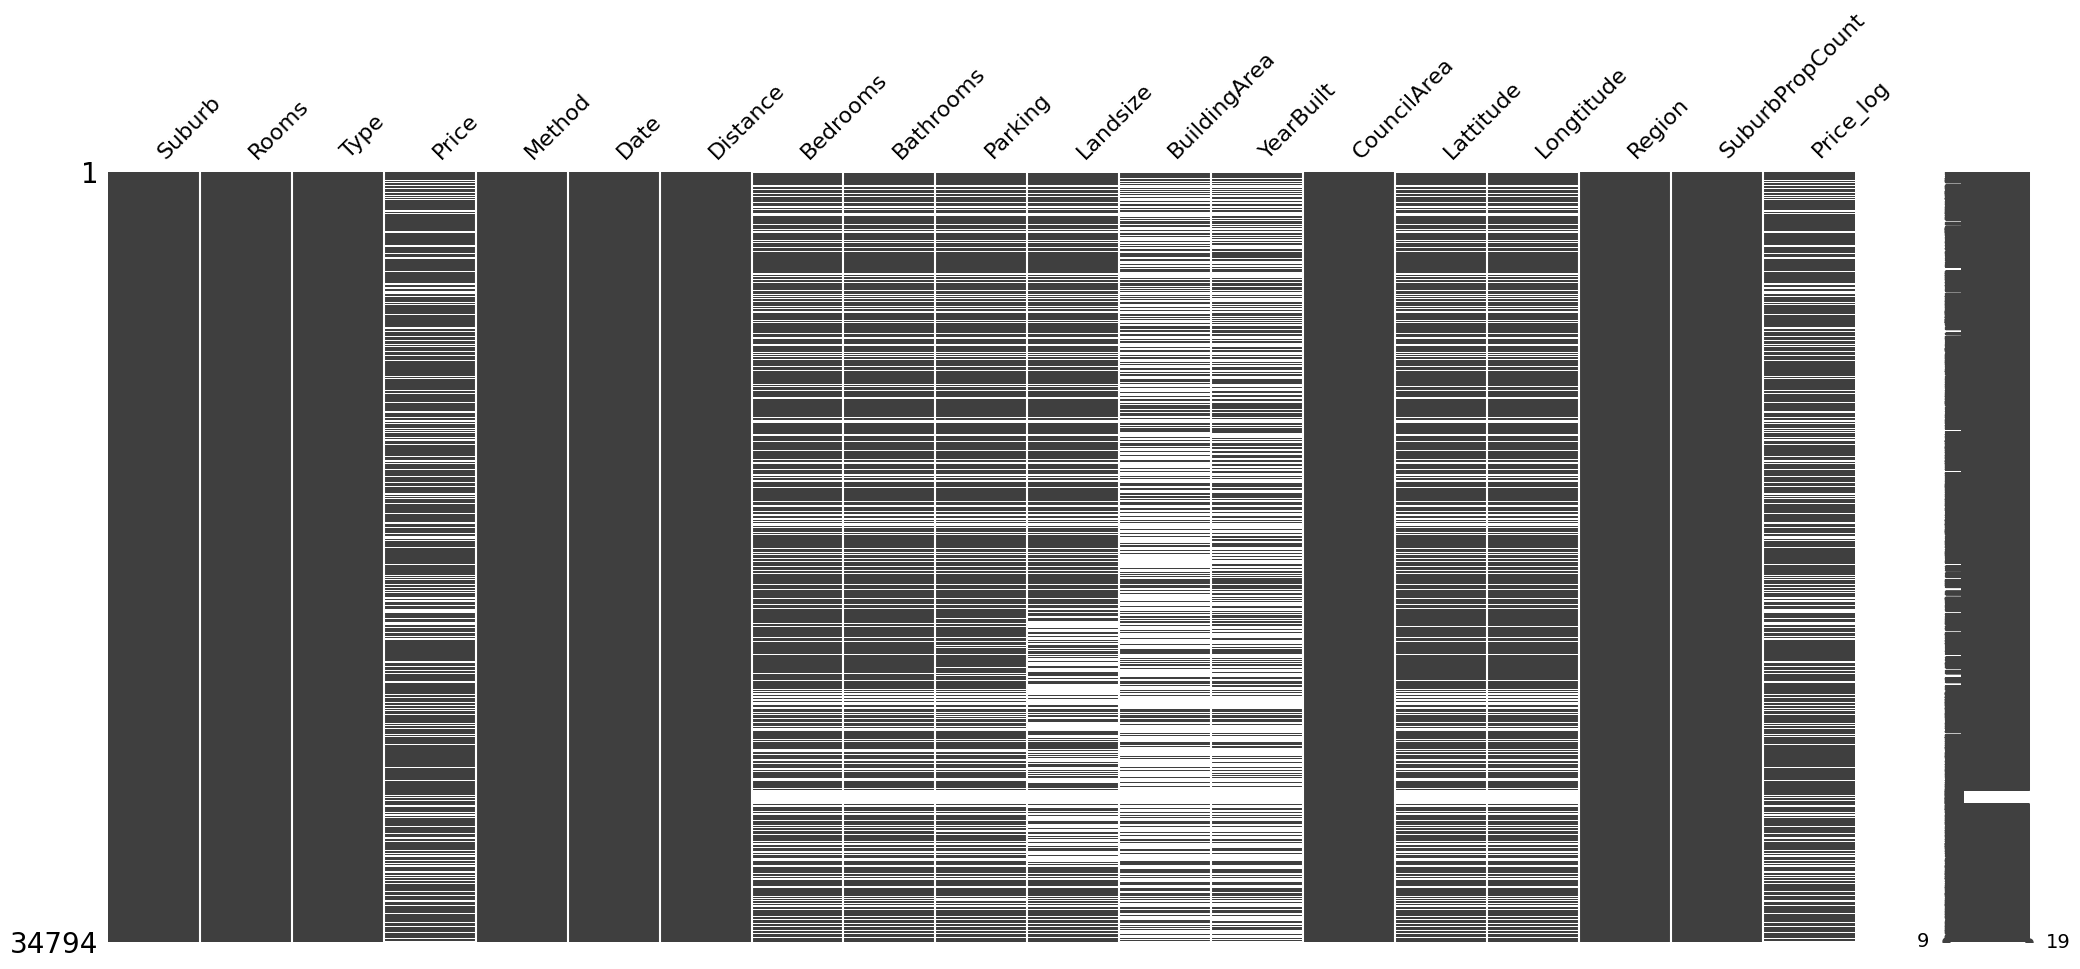

In [49]:
import missingno as msno
msno.matrix(df);

The missing values for CouncilArea seem to be at the end of the list, the one for parking also very localized, the others ones are all over the place.

## CouncilArea

In [50]:
df['CouncilArea'].unique()

array(['Yarra City Council', 'Moonee Valley City Council',
       'Port Phillip City Council', 'Darebin City Council',
       'Hobsons Bay City Council', 'Stonnington City Council',
       'Boroondara City Council', 'Monash City Council',
       'Glen Eira City Council', 'Whitehorse City Council',
       'Maribyrnong City Council', 'Bayside City Council',
       'Moreland City Council', 'Manningham City Council',
       'Melbourne City Council', 'Banyule City Council',
       'Brimbank City Council', 'Kingston City Council',
       'Hume City Council', 'Knox City Council', 'Maroondah City Council',
       'Casey City Council', 'Melton City Council',
       'Greater Dandenong City Council', 'Nillumbik Shire Council',
       'Cardinia Shire Council', 'Whittlesea City Council',
       'Frankston City Council', 'Macedon Ranges Shire Council',
       'Yarra Ranges Shire Council', 'Wyndham City Council',
       'Moorabool Shire Council', 'Mitchell Shire Council', '#N/A'],
      dtype=object)

In [51]:
df.loc[df.CouncilArea.isin(['Unavailable'])]

Empty DataFrame
Columns: [Suburb, Rooms, Type, Price, Method, Date, Distance, Bedrooms, Bathrooms, Parking, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude, Longtitude, Region, SuburbPropCount, Price_log]
Index: []

In [53]:
df["CouncilArea"].isna().sum()

0

In [55]:
df.isna().sum()

Suburb                 0
Rooms                  0
Type                   0
Price               7574
Method                 0
Date                   0
Distance               1
Bedrooms            8176
Bathrooms           8185
Parking             8685
Landsize           11768
BuildingArea       21245
YearBuilt          19249
CouncilArea            0
Lattitude           7935
Longtitude          7935
Region                 0
SuburbPropCount        3
Price_log           7574
dtype: int64

In [ ]:
df.info()

In [ ]:
# No CouncilArea - NA or Unavailable
# df['CouncilArea'].fillna(value = "Missing", inplace = True)
# df['CouncilArea'].replace(to_replace="Unavailable", value="Missing", inplace=True)

In [ ]:
df['CouncilArea'].unique()

A better way would be to find a list of CouncilAreas and fill the correct values in it.

## BuildingArea

In [56]:
# simplest way, replace the building area by the mean value of the other entries
BA_mean = df['BuildingArea'].mean()
df['BuildingArea'].replace(to_replace=np.nan, value=BA_mean, inplace=True)
df['BuildingArea'].isnull().sum()
BA_mean

156.6824857923094

In [57]:
df["BuildingArea"].isna().sum()

0

## YearBuilt

In [58]:
YB_median = df['YearBuilt'].median()
df['YearBuilt'].replace(to_replace=np.nan, value=YB_median, inplace=True)
df['YearBuilt'].isnull().sum()
YB_median

1970.0

In [59]:
df["YearBuilt"].isna().sum()

0

## Parking

In [60]:
PK_median = df['Parking'].median()
df['Parking'].replace(to_replace=np.nan, value=PK_median, inplace=True)
df['Parking'].isnull().sum()
PK_median

2.0

In [61]:
df["Parking"].isna().sum()

0

In [63]:
df.shape

(34794, 19)

In [62]:
df.isna().sum()

Suburb                 0
Rooms                  0
Type                   0
Price               7574
Method                 0
Date                   0
Distance               1
Bedrooms            8176
Bathrooms           8185
Parking                0
Landsize           11768
BuildingArea           0
YearBuilt              0
CouncilArea            0
Lattitude           7935
Longtitude          7935
Region                 0
SuburbPropCount        3
Price_log           7574
dtype: int64

In [ ]:
msno.matrix(df);

In [69]:
# Price is our label so delete rows with NA price
df.dropna(axis="rows", subset=["Price"], inplace=True)
df.shape

(27220, 19)

In [70]:
df.isna().sum()

Suburb                0
Rooms                 0
Type                  0
Price                 0
Method                0
Date                  0
Distance              1
Bedrooms           6430
Bathrooms          6436
Parking               0
Landsize           9254
BuildingArea          0
YearBuilt             0
CouncilArea           0
Lattitude          6243
Longtitude         6243
Region                0
SuburbPropCount       3
Price_log             0
dtype: int64

In [71]:
BR_median = df['Bedrooms'].median()
df['Bedrooms'].replace(to_replace=np.nan, value=BR_median, inplace=True)
df['Bedrooms'].isnull().sum()
BR_median

3.0

In [72]:
BA_median = df['Bathrooms'].median()
df['Bathrooms'].replace(to_replace=np.nan, value=BA_median, inplace=True)
df['Bathrooms'].isnull().sum()
BA_median

1.0

In [73]:
df.isna().sum()

Suburb                0
Rooms                 0
Type                  0
Price                 0
Method                0
Date                  0
Distance              1
Bedrooms              0
Bathrooms             0
Parking               0
Landsize           9254
BuildingArea          0
YearBuilt             0
CouncilArea           0
Lattitude          6243
Longtitude         6243
Region                0
SuburbPropCount       3
Price_log             0
dtype: int64

In [74]:
# drop rows with Landsize NA
df.dropna(axis="rows", subset=["Landsize"], inplace=True)
df.shape

(17966, 19)

In [75]:
df.isna().sum()

Suburb              0
Rooms               0
Type                0
Price               0
Method              0
Date                0
Distance            0
Bedrooms            0
Bathrooms           0
Parking             0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Lattitude          22
Longtitude         22
Region              0
SuburbPropCount     0
Price_log           0
dtype: int64

In [76]:
LA_mean = df['Lattitude'].mean()
df['Lattitude'].replace(to_replace=np.nan, value=LA_mean, inplace=True)
df['Lattitude'].isnull().sum()
LA_mean

-37.8066156592733

In [77]:
df.isna().sum()

Suburb              0
Rooms               0
Type                0
Price               0
Method              0
Date                0
Distance            0
Bedrooms            0
Bathrooms           0
Parking             0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude         22
Region              0
SuburbPropCount     0
Price_log           0
dtype: int64

In [78]:
LO_mean = df['Longtitude'].mean()
df['Longtitude'].replace(to_replace=np.nan, value=LO_mean, inplace=True)
df['Longtitude'].isnull().sum()
LO_mean

144.99602844014711

In [79]:
df.isna().sum()

Suburb             0
Rooms              0
Type               0
Price              0
Method             0
Date               0
Distance           0
Bedrooms           0
Bathrooms          0
Parking            0
Landsize           0
BuildingArea       0
YearBuilt          0
CouncilArea        0
Lattitude          0
Longtitude         0
Region             0
SuburbPropCount    0
Price_log          0
dtype: int64

In [65]:
# dropna test
tdf = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})
tdf

name        toy       born
0    Alfred        NaN        NaT
1    Batman  Batmobile 1940-04-25
2  Catwoman   Bullwhip        NaT

In [66]:
tdf.dropna(axis="rows", subset=["toy"], inplace=True)
tdf

name        toy       born
1    Batman  Batmobile 1940-04-25
2  Catwoman   Bullwhip        NaT

In [80]:
Dataset.Tabular.register_pandas_dataframe(dataframe = df, target = datastore, name ='Melbourne Housing Dataset', description = 'Data Cleansing 2 - replaced missing values')

Validating arguments.
Arguments validated.
Successfully obtained datastore reference and path.
Uploading file to managed-dataset/cef6b3f7-0d01-45d9-86e2-51e7007a7a36/
Successfully uploaded file to datastore.
Creating and registering a new dataset.
Successfully created and registered a new dataset.


{
  "source": [
    "('mldemoblob', 'managed-dataset/cef6b3f7-0d01-45d9-86e2-51e7007a7a36/')"
  ],
  "definition": [
    "GetDatastoreFiles",
    "ReadParquetFile",
    "DropColumns"
  ],
  "registration": {
    "id": "8f6246b0-8e87-48fc-ac84-6f18cadaaa6a",
    "name": "Melbourne Housing Dataset",
    "version": 5,
    "description": "Data Cleansing 2 - replaced missing values",
    "workspace": "Workspace.create(name='mldemows', subscription_id='292890d4-aa6d-4d5e-a085-97c80db3c30a', resource_group='mldemo')"
  }
}

# Correlations

Let us have a look at the correlation between different features with a correlation matrix.

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17966 entries, 1 to 34856
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           17966 non-null  object        
 1   Rooms            17966 non-null  int64         
 2   Type             17966 non-null  object        
 3   Price            17966 non-null  float64       
 4   Method           17966 non-null  object        
 5   Date             17966 non-null  datetime64[ns]
 6   Distance         17966 non-null  float64       
 7   Bedrooms         17966 non-null  float64       
 8   Bathrooms        17966 non-null  float64       
 9   Parking          17966 non-null  float64       
 10  Landsize         17966 non-null  float64       
 11  BuildingArea     17966 non-null  float64       
 12  YearBuilt        17966 non-null  float64       
 13  CouncilArea      17966 non-null  object        
 14  Lattitude        17966 non-null  float

/var/folders/bg/qstlmb2n6cncqw_g_cy3jgt00000gn/T/ipykernel_2815/1670232956.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



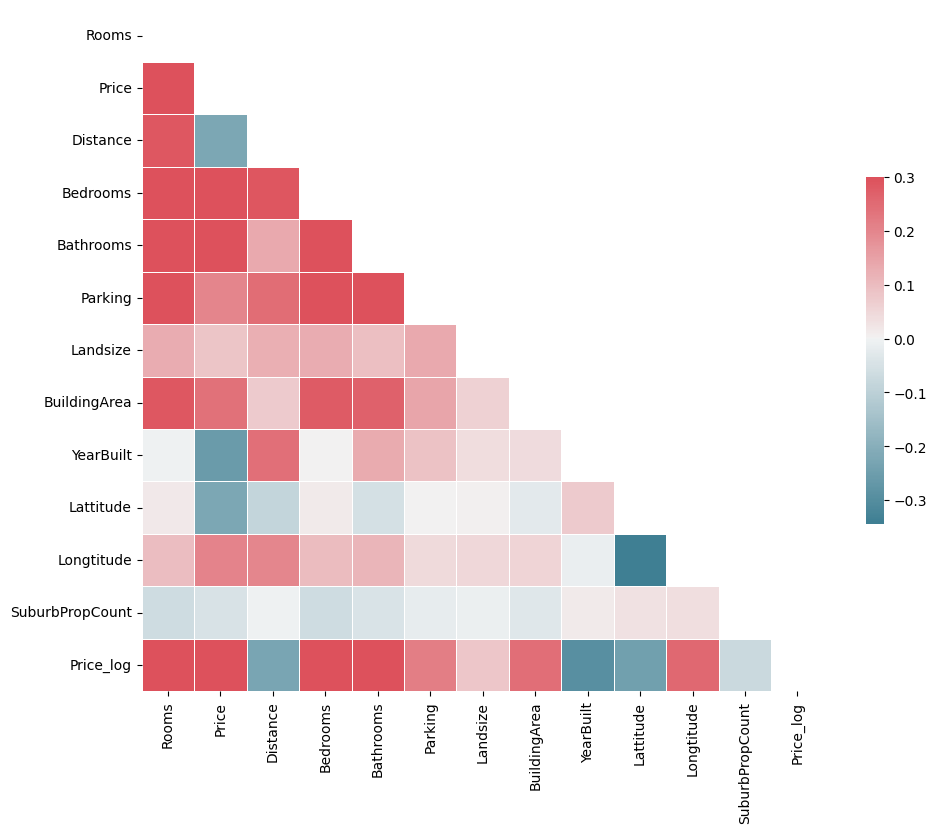

In [82]:
# compute the correlation matrix
corr = df.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

As we can see, we are missing features. There are 13 features shown, which are all the numerical columns. This means, the algorithm cannot handle our objects and datetime columns. Let us change that

## Converting Categorical Types

In [83]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

Suburb   Type               Method         CouncilArea  \
1  Abbotsford  house        Property Sold  Yarra City Council   
2  Abbotsford  house        Property Sold  Yarra City Council   
4  Abbotsford  house  Property Sold Prior  Yarra City Council   
5  Abbotsford  house   Property Passed In  Yarra City Council   
6  Abbotsford  house           Vendor Bid  Yarra City Council   

                  Region  
1  Northern Metropolitan  
2  Northern Metropolitan  
4  Northern Metropolitan  
5  Northern Metropolitan  
6  Northern Metropolitan

In [84]:
# Let's convert all columns in the object dataframe to the "categorical" datatype
for cl in obj_df.columns:
    obj_df[cl] = obj_df[cl].astype('category')
    
obj_df.dtypes

Suburb         category
Type           category
Method         category
CouncilArea    category
Region         category
dtype: object

In [85]:
for cl in obj_df.columns:
    obj_df[cl+"_cat"] = obj_df[cl].cat.codes
obj_df.head()

Suburb   Type               Method         CouncilArea  \
1  Abbotsford  house        Property Sold  Yarra City Council   
2  Abbotsford  house        Property Sold  Yarra City Council   
4  Abbotsford  house  Property Sold Prior  Yarra City Council   
5  Abbotsford  house   Property Passed In  Yarra City Council   
6  Abbotsford  house           Vendor Bid  Yarra City Council   

                  Region  Suburb_cat  Type_cat  Method_cat  CouncilArea_cat  \
1  Northern Metropolitan           0         0           1               31   
2  Northern Metropolitan           0         0           1               31   
4  Northern Metropolitan           0         0           2               31   
5  Northern Metropolitan           0         0           0               31   
6  Northern Metropolitan           0         0           4               31   

   Region_cat  
1           2  
2           2  
4           2  
5           2  
6           2

In [86]:
# Now we will incorporate the numbered versions of our categorical data into a new dataframe
column_replacement = {'Type':'Type_cat','Suburb':'Suburb_cat','Method':'Method_cat','CouncilArea':'CouncilArea_cat','Region':'Region_cat'}
cont_df = df.copy()
for key in column_replacement:
    cont_df[key] = obj_df[column_replacement[key]]
cont_df.dtypes

Suburb                      int16
Rooms                       int64
Type                         int8
Price                     float64
Method                       int8
Date               datetime64[ns]
Distance                  float64
Bedrooms                  float64
Bathrooms                 float64
Parking                   float64
Landsize                  float64
BuildingArea              float64
YearBuilt                 float64
CouncilArea                  int8
Lattitude                 float64
Longtitude                float64
Region                       int8
SuburbPropCount           float64
Price_log                 float64
dtype: object

In [87]:
cont_df['Date_Epoch'] = cont_df['Date'].apply(lambda x: x.timestamp())
cont_df.drop(['Date'], axis=1, inplace=True)
cont_df.dtypes

Suburb               int16
Rooms                int64
Type                  int8
Price              float64
Method                int8
Distance           float64
Bedrooms           float64
Bathrooms          float64
Parking            float64
Landsize           float64
BuildingArea       float64
YearBuilt          float64
CouncilArea           int8
Lattitude          float64
Longtitude         float64
Region                int8
SuburbPropCount    float64
Price_log          float64
Date_Epoch         float64
dtype: object

In [88]:
for cl in cont_df.columns:
    if (cont_df[cl].dtype == np.float64 and cl not in ['Lattitude', 'Longtitude', 'Price_log', 'Distance']):
        cont_df[cl] = cont_df[cl].astype('int')
cont_df.dtypes

Suburb               int16
Rooms                int64
Type                  int8
Price                int64
Method                int8
Distance           float64
Bedrooms             int64
Bathrooms            int64
Parking              int64
Landsize             int64
BuildingArea         int64
YearBuilt            int64
CouncilArea           int8
Lattitude          float64
Longtitude         float64
Region                int8
SuburbPropCount      int64
Price_log          float64
Date_Epoch           int64
dtype: object

## Correlation with converted categories

/var/folders/bg/qstlmb2n6cncqw_g_cy3jgt00000gn/T/ipykernel_2815/3726888787.py:6: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



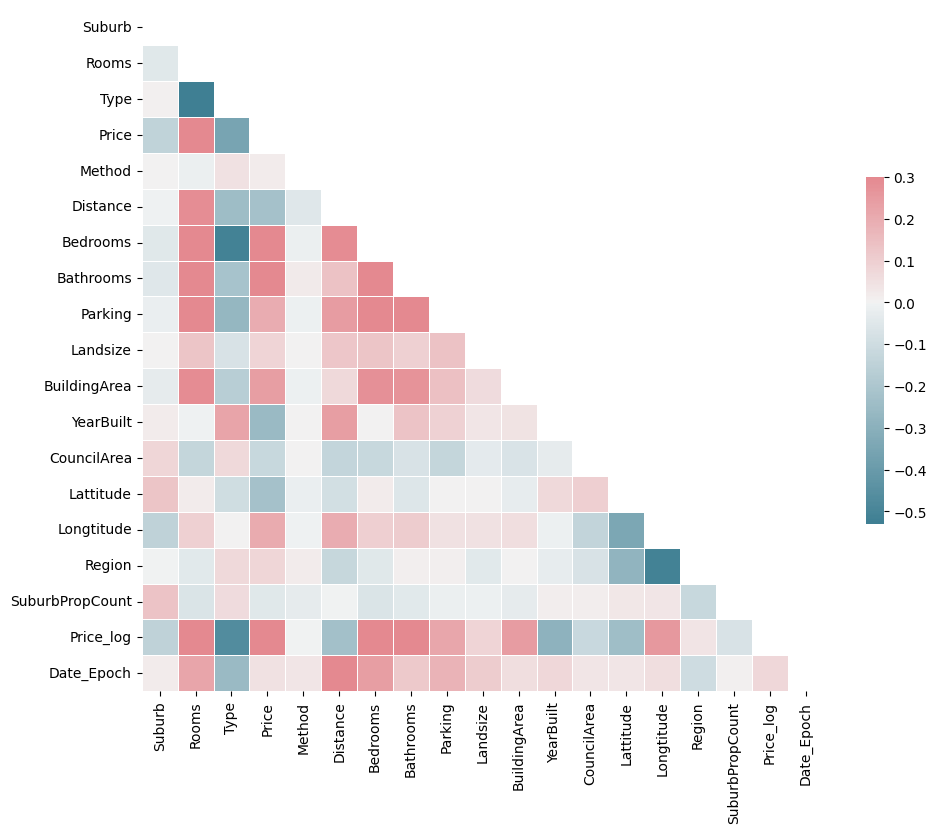

In [89]:
# Let us do the correlation again
# Compute the correlation matrix
corr = cont_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

What can we see:

- Rooms is strongly correlated with Price, Price_log, Distance, Bedrooms, Bathrooms, Parking and Building Area
- Type is strongly correlated with Price, Price_log, Bedrooms, YearBuilt and Rooms
- Price is strongly correlated with Rooms, Type, Bedrooms, Bathrooms, Parking BuildingArea
- Suburb, Method, Landsize and SuburbPropCount seem not to have to much influence in its current state on other features or the target


In [90]:
Dataset.Tabular.register_pandas_dataframe(dataframe = cont_df, target = datastore, name ='Melbourne Housing Dataset', description = 'Data Cleansing 3 - all features converted to numerical values')

Validating arguments.
Arguments validated.
Successfully obtained datastore reference and path.
Uploading file to managed-dataset/cc87f705-fa38-43ff-8aac-9c9c4667ea5d/
Successfully uploaded file to datastore.
Creating and registering a new dataset.
Successfully created and registered a new dataset.


{
  "source": [
    "('mldemoblob', 'managed-dataset/cc87f705-fa38-43ff-8aac-9c9c4667ea5d/')"
  ],
  "definition": [
    "GetDatastoreFiles",
    "ReadParquetFile",
    "DropColumns"
  ],
  "registration": {
    "id": "3ea5a5e0-8d83-447d-b1dd-60c33afcb680",
    "name": "Melbourne Housing Dataset",
    "version": 6,
    "description": "Data Cleansing 3 - all features converted to numerical values",
    "workspace": "Workspace.create(name='mldemows', subscription_id='292890d4-aa6d-4d5e-a085-97c80db3c30a', resource_group='mldemo')"
  }
}

# Feature Importance

## Price as the Target

In [91]:
from sklearn.ensemble import ExtraTreesRegressor

# create X and Y vectors
ignored_col = ['Price', 'Price_log', 'Date']
cols = [c for c in cont_df.columns if c not in ignored_col]
X = cont_df[cols]
y = cont_df['Price']

# define the regression forest
forest = ExtraTreesRegressor(n_estimators=250, criterion='mse', random_state=0, max_depth=10)

# run the forest fitting with our vectors
forest.fit(X, y)

# create indices order for feature importance
importances = forest.feature_importances_
tree_importances = np.array([tree.feature_importances_ for tree in forest.estimators_])
indices = np.argsort(importances)[::-1]

imp_df = pd.DataFrame([tree.feature_importances_ for tree in forest.estimators_], columns = cols)

# sort columns by importance
imp_df = imp_df[[cols[i] for i in indices.tolist()]]
imp_df.head()

/Users/mahtabsyed/Mastering Azure ML/Azure Machine Learning Demo/.venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



Type    Region  Distance  Lattitude  Bathrooms  Longtitude     Rooms  \
0  0.187555  0.123977  0.130779   0.109179   0.148099    0.081303  0.011993   
1  0.181476  0.190613  0.064238   0.048287   0.027558    0.228853  0.015679   
2  0.172922  0.091964  0.158719   0.054906   0.027481    0.034761  0.161468   
3  0.184875  0.101689  0.150031   0.112604   0.158361    0.110276  0.015734   
4  0.173447  0.109261  0.194281   0.166131   0.021396    0.064337  0.121720   

   CouncilArea  Bedrooms  Landsize  BuildingArea  YearBuilt  SuburbPropCount  \
0     0.067589  0.062829  0.039774      0.016656   0.001529         0.011448   
1     0.039561  0.124330  0.014645      0.027082   0.011089         0.016254   
2     0.142721  0.016686  0.029067      0.012358   0.069729         0.010273   
3     0.032387  0.047529  0.044919      0.007863   0.012007         0.010738   
4     0.055779  0.011055  0.022611      0.023784   0.001154         0.016681   

     Suburb   Parking  Date_Epoch    Method  
0  0.002427  0.002448    0.001197  0.001219  
1  0.002235  0.003999    0.000949  0.003152  
2  0.002031  0.009087    0.002468  0.003359  
3  0.002817  0.003066    0.003244  0.001859  
4  0.006242  0.003999    0.006398  0.001725

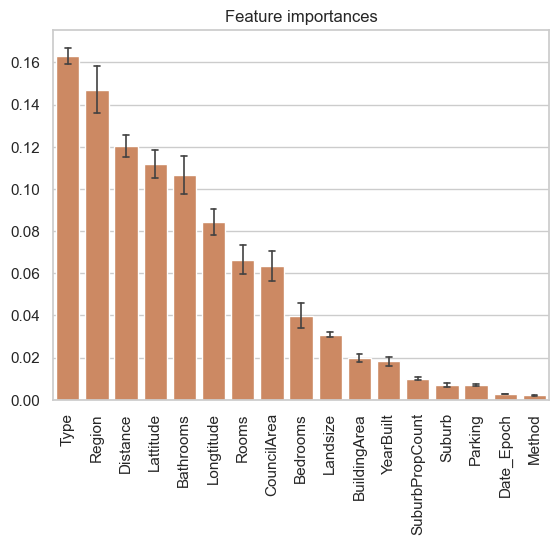

In [92]:
# creating barplot to visualize feature importance
sns.set(style="whitegrid")
palette = sns.color_palette(n_colors=3)
fig = plt.figure()

ax = sns.barplot(data=imp_df, color=palette[1], capsize=.2, errwidth=1.2)
plt.title("Feature importances")
plt.xticks(range(X.shape[1]), rotation='vertical')
plt.show()

## log(Price) Target

In [93]:
from sklearn.ensemble import ExtraTreesRegressor

# create X and Y vectors
ignored_col = ['Price', 'Price_log', 'Date']
cols = [c for c in cont_df.columns if c not in ignored_col]
X = cont_df[cols]
y = cont_df['Price_log']

# define the regression forest
forest = ExtraTreesRegressor(n_estimators=250, criterion='mse', random_state=0, max_depth=10)

# run the forest fitting with our vectors
forest.fit(X, y)

# create indices order for feature importance
importances = forest.feature_importances_
tree_importances = np.array([tree.feature_importances_ for tree in forest.estimators_])
indices = np.argsort(importances)[::-1]

imp_df = pd.DataFrame([tree.feature_importances_ for tree in forest.estimators_], columns = cols)

# sort columns by importance
imp_df = imp_df[[cols[i] for i in indices.tolist()]]
imp_df.head()

/Users/mahtabsyed/Mastering Azure ML/Azure Machine Learning Demo/.venv/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning:

Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.



Type  Lattitude  Distance    Region  Longtitude     Rooms  Bathrooms  \
0  0.303509   0.038625  0.120284  0.263724    0.040346  0.028331   0.072256   
1  0.293349   0.140509  0.055843  0.159339    0.168238  0.034758   0.038312   
2  0.289459   0.055607  0.138033  0.178120    0.109354  0.123095   0.007201   
3  0.286232   0.078619  0.046262  0.249369    0.154349  0.057242   0.010120   
4  0.261406   0.165949  0.139961  0.051785    0.140450  0.081518   0.033178   

   Bedrooms  CouncilArea  Landsize  SuburbPropCount  BuildingArea  YearBuilt  \
0  0.043526     0.029918  0.012276         0.009211      0.007892   0.001629   
1  0.056319     0.006442  0.016012         0.005598      0.005951   0.004246   
2  0.050317     0.011625  0.010890         0.004587      0.005706   0.003557   
3  0.060576     0.013642  0.012998         0.007698      0.004512   0.002531   
4  0.060196     0.011834  0.006806         0.011607      0.005777   0.019241   

    Parking    Suburb    Method  Date_Epoch  
0  0.019839  0.002208  0.004789    0.001636  
1  0.002983  0.006722  0.003149    0.002230  
2  0.005866  0.002367  0.002681    0.001534  
3  0.004077  0.005754  0.003225    0.002795  
4  0.003889  0.001500  0.002635    0.002268

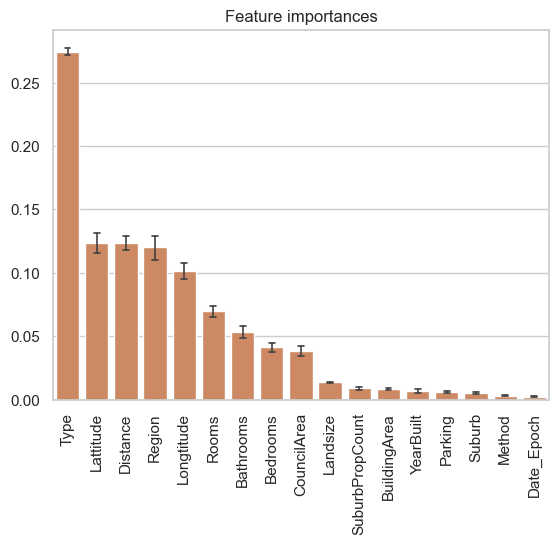

In [94]:
sns.set(style="whitegrid")
palette = sns.color_palette(n_colors=3)
fig = plt.figure()

ax = sns.barplot(data=imp_df, color=palette[1], capsize=.2, errwidth=1.2)
plt.title("Feature importances")
plt.xticks(range(X.shape[1]), rotation='vertical')
plt.show()

## Digging deeper on correlation between Price and Type

In [95]:
fig = px.box(df, y="Price_log",x='Type', color = 'Type', 
                 category_orders={"Type": ["house", "townhouse", "unit"]})
fig.show()